In [1]:
cd /data/store01/data_dirs/students/ucfafyi/S2_MODIS

/data/store01/data_dirs/students/ucfafyi/S2_MODIS


In [2]:
%matplotlib inline
import sys
sys.path.insert(0, 'python')
from Aerosol_solving import *
from read_aeronet import *
from nicer_plot import *
plot_config()

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
aot_sol = Aerosol_retrival(S2_fname='50SKG',\
                           lat=37.474469, lon=114.256327, S2_day=3, S2_month=5,\
                           S2_psf=[ 30.09105264,  38.41872364,  -9.25661326,  33.33619435,   3.75537663], year=2016)
aot, wv= aot_sol.S2_aot()
sr = aot_sol.S2_cor()

python/Aerosol_solving.py:225: RuntimeWarning: invalid value encountered in double_scalars
  def L8_get_to_cor(self, band):
python/smoothn.py:193: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W != None:
python/smoothn.py:211: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W == None:


Saving surface reflectance....


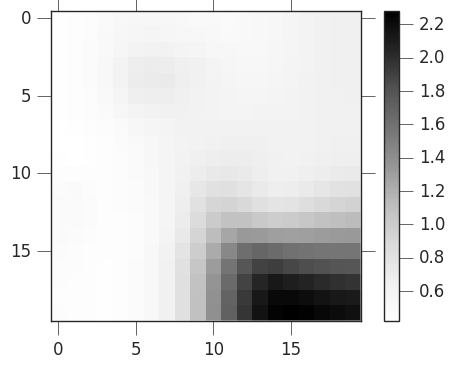

In [21]:
plt.imshow(aot_sol.twv_map, interpolation ='None', cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()

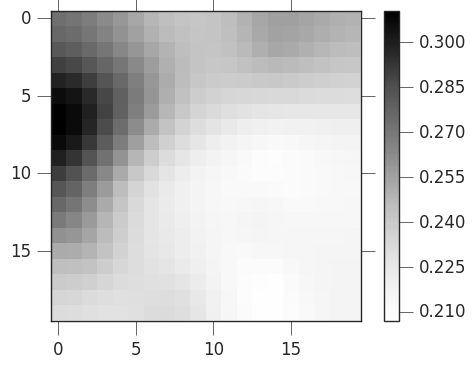

In [5]:
plt.imshow(aot_sol.aot_map, interpolation ='None', cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()

In [17]:
aot_sol.twv_map[16,12], aot_sol.aot_map[16,12]

(1.7817138144270346, 0.20961830462807707)

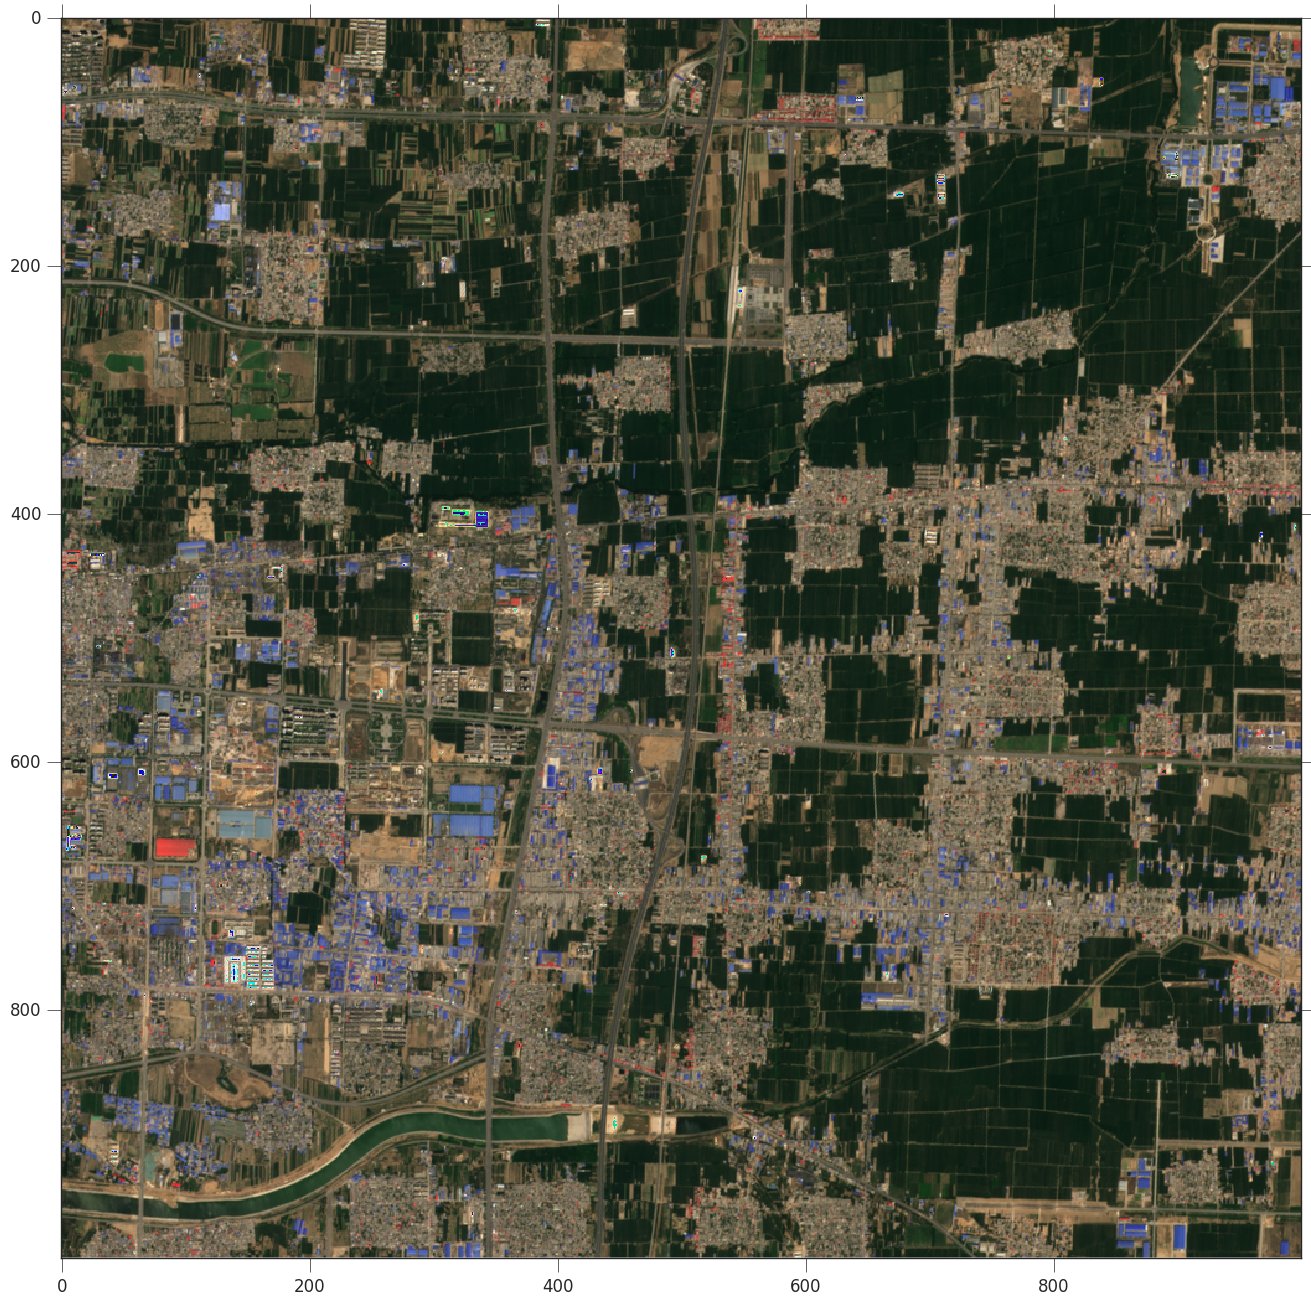

In [22]:
i,j=9,8 
sl_x, sl_y = slice(i*1000, (i+1)*1000), slice(j*1000, (j+1)*1000)
fig = plt.figure(figsize=(16,16))
plt.imshow(np.array([sr[2],sr[1], sr[0]]).transpose(1,2,0)[sl_x, sl_y,:]*3, interpolation='None')

In [25]:
ndvi = (sr[3]-sr[2])/(sr[2]+sr[3])

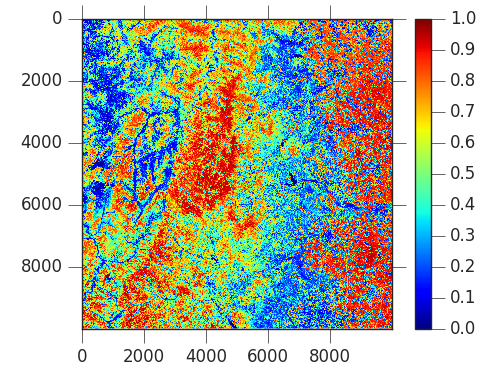

In [28]:
plt.imshow(ndvi, interpolation='None', vmin=0, vmax=1)
plt.colorbar()

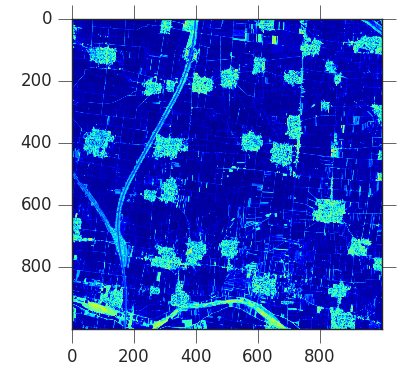

In [48]:
plt.imshow(sr[2,2000:3000, 9000:10000])

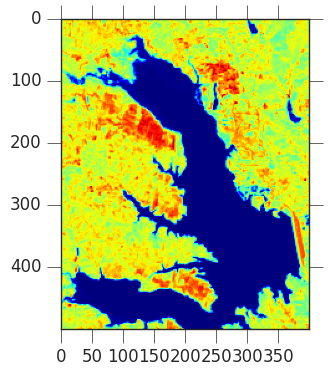

In [114]:
plt.imshow()

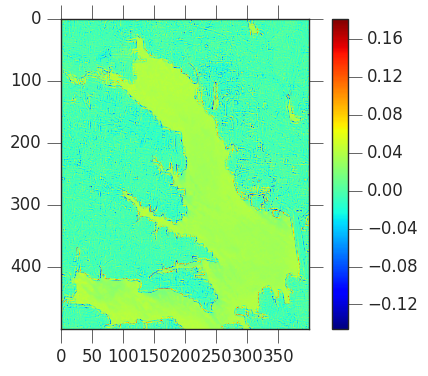

In [117]:
plt.imshow(sr[3,4900:5400, 6550:6950]-sr[-1,4900:5400, 6550:6950])
plt.colorbar()

In [105]:
ndvi_ = (sr[3,4900:5400, 6550:6950]-sr[2,4900:5400, 6550:6950])/(sr[3,4900:5400, 6550:6950]+sr[2,4900:5400, 6550:6950])

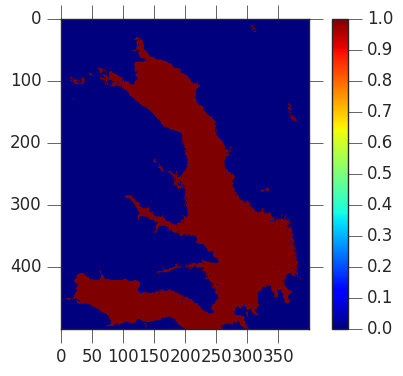

In [108]:
plt.imshow(ndvi_<0)
plt.colorbar()

In [110]:
water_mask = ndvi_<0
water = sr[:,4900:5400, 6550:6950][:,water_mask]

In [119]:
veg_mask = ndvi>0.7
soil_mask = (ndvi<0.1)&(ndvi>0)
vegs = sr[:,2000:3000, 9000:10000][:,veg_mask[2000:3000, 9000:10000]]
soil = sr[:,2000:3000, 9000:10000][:,soil_mask[2000:3000, 9000:10000]]
vegs[[-3,-2,-1],:] = vegs[[-1, -3,-2],:]
soil[[-3,-2,-1],:] = soil[[-1, -3,-2],:]
water[[-3,-2,-1],:] = water[[-1, -3,-2],:]

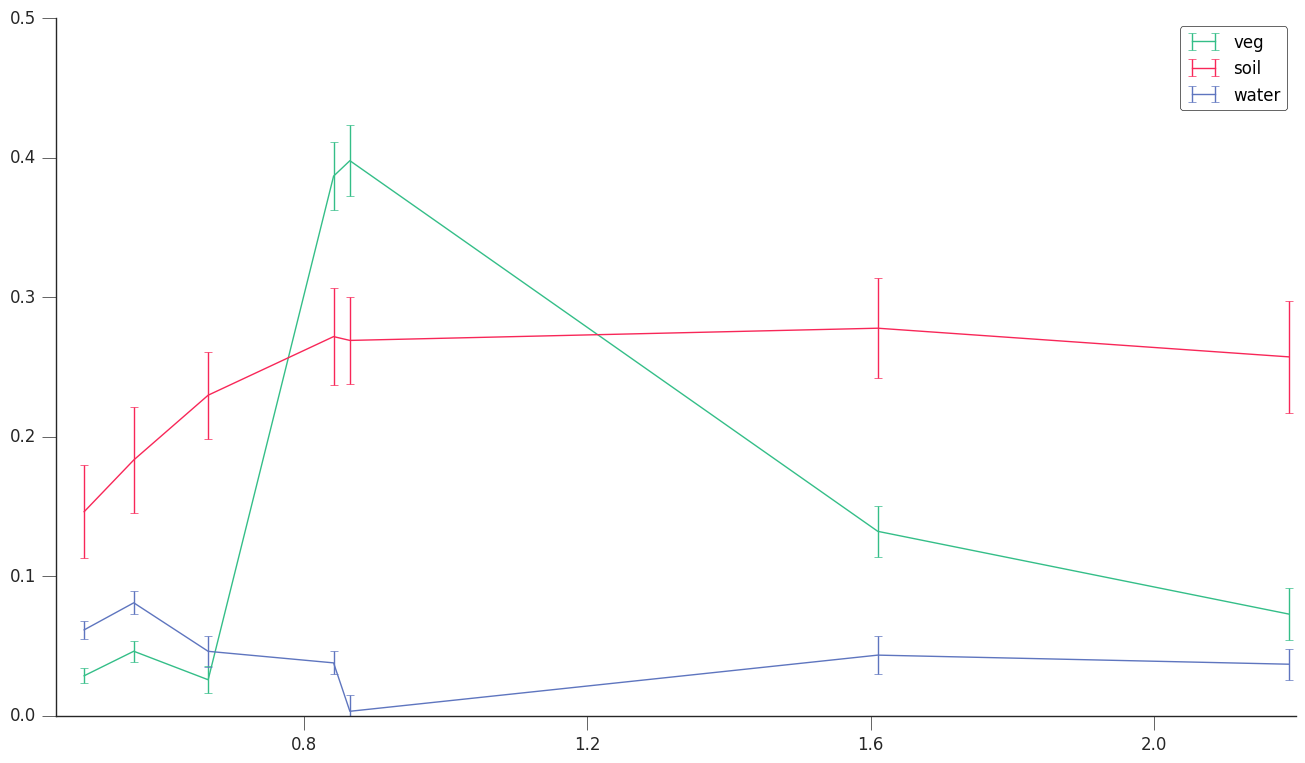

In [141]:
fig = plt.figure(figsize=(16,9))
wl=0.490,0.560,0.665,0.842, 0.865, 1.610,2.190
ax = fig.add_subplot(1,1,1)
ax.errorbar(wl,y=vegs.mean(axis=1),yerr=vegs.std(axis=1), fmt = '-', lw=1, color='#34be88', label='veg')
ax.errorbar(wl,y=soil.mean(axis=1),yerr=soil.std(axis=1), fmt = '-', lw=1, color='#f82758', label='soil')
ax.errorbar(wl,y=water.mean(axis=1),yerr=water.std(axis=1), fmt = '-', lw=1, color='#5e75bf', label='water')
ax.set_xlim(0.45, 2.2)
ax.set_ylim(0., 0.5)
pretty_axes(ax)
ax.set_yticks(np.arange(0,0.51, 0.1))
plt.legend()